In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)
from utils.funs import get_nested_attr

In [2]:
## LLAMA models
from transformers import AutoModelForCausalLM

path = ["model.layers[", 
        "].self_attn.q_proj.weight", 
        "].self_attn.k_proj.weight"]

'LLAMA 2 7b (l = 32, d = 4096, h = 32 ; tot num parameters 7B)'
dh = 128
l = 32
d = 4096
h = d // dh
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-hf")

M = []
for layer in range(l):
    Wq = get_nested_attr(model, path[0] + f"{layer}" + path[1]).T.detach()
    Wk = get_nested_attr(model, path[0] + f"{layer}" + path[2]).T.detach()
    M.append(Wq @ Wk.T)

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:21<00:00, 10.77s/it]


score 0.10204081632653061
 columns : 54 , rows: 44


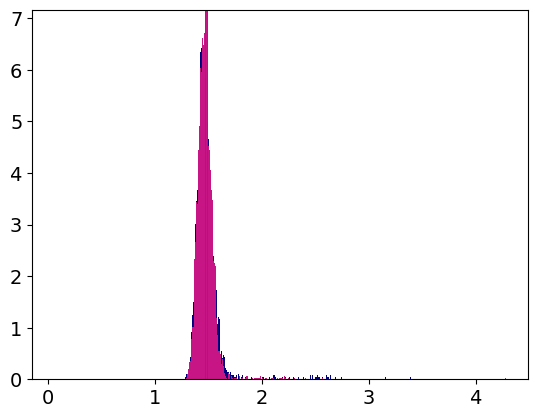

In [9]:
layer = 4

column_norms = np.log(np.linalg.norm(M[layer], axis = 0))
row_norms = np.log(np.linalg.norm(M[layer], axis = 1))
column_mean = column_norms.mean()
column_std = column_norms.std()
column_median = np.mean(column_norms)
row_mean = row_norms.mean()
row_std = row_norms.std()
row_median = np.median(row_norms)

num_std = 3
row_outliers = np.sum(row_norms > row_mean + num_std * row_std)
column_outliers = np.sum(column_norms > column_mean + num_std * column_std)


print(f"score {(column_outliers - row_outliers) / (column_outliers + row_outliers)}")
print(f' columns : {column_outliers} , rows: {row_outliers}')
plt.hist(column_norms, density = True, bins = 500, color = 'navy')
plt.hist(row_norms, density = True, bins = 500, color = 'mediumvioletred')
plt.axvline(x = column_mean, color = 'navy', linewidth = 2)
plt.axvline(x = row_mean, color = 'mediumvioletred', linewidth = 2)

In [16]:
scores = []
num_std = 3
for layer in range(l):
    
    column_norms = np.log(np.linalg.norm(M[layer], axis = 0))
    row_norms = np.log(np.linalg.norm(M[layer], axis = 1))
    column_mean = column_norms.mean()
    column_std = column_norms.std()
    column_median = np.mean(column_norms)
    row_mean = row_norms.mean()
    row_std = row_norms.std()
    row_median = np.median(row_norms)

    row_outliers = np.sum(row_norms > row_mean + num_std * row_std)
    column_outliers = np.sum(column_norms > column_mean + num_std * column_std)

    scores.append((column_outliers - row_outliers) / (column_outliers + row_outliers))

In [17]:
np.median(scores)

0.13205453392517438

In [18]:
## ROBERTA models
from transformers import RobertaModel

path = ["encoder.layer[", 
        "].attention.self.query.weight", 
        "].attention.self.key.weight"]

'ROBERTA base (l = 24, d = 1024, h = 16 ; 125M parameters)'
dh = 64
l = 12
d = 768
h = d // dh
model = RobertaModel.from_pretrained('roberta-base')

M = []
for layer in range(l):
    Wq = get_nested_attr(model, path[0] + f"{layer}" + path[1]).T.detach()
    Wk = get_nested_attr(model, path[0] + f"{layer}" + path[2]).T.detach()
    M.append(Wq @ Wk.T)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


score -0.10344827586206896
 columns : 13 , rows: 16


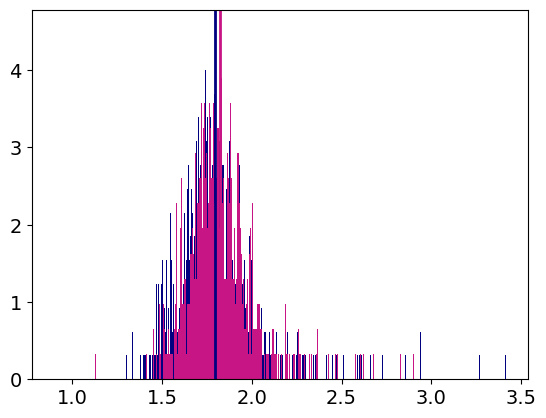

In [24]:
layer = 1

column_norms = np.log(np.linalg.norm(M[layer], axis = 0))
row_norms = np.log(np.linalg.norm(M[layer], axis = 1))
column_mean = column_norms.mean()
column_std = column_norms.std()
column_median = np.mean(column_norms)
row_mean = row_norms.mean()
row_std = row_norms.std()
row_median = np.median(row_norms)

num_std = 3
row_outliers = np.sum(row_norms > row_mean + num_std * row_std)
column_outliers = np.sum(column_norms > column_mean + num_std * column_std)


print(f"score {(column_outliers - row_outliers) / (column_outliers + row_outliers)}")
print(f' columns : {column_outliers} , rows: {row_outliers}')
plt.hist(column_norms, density = True, bins = 500, color = 'navy')
plt.hist(row_norms, density = True, bins = 500, color = 'mediumvioletred')
plt.axvline(x = column_mean, color = 'navy', linewidth = 2)
plt.axvline(x = row_mean, color = 'mediumvioletred', linewidth = 2)

In [25]:
scores = []
num_std = 3
for layer in range(l):
    
    column_norms = np.log(np.linalg.norm(M[layer], axis = 0))
    row_norms = np.log(np.linalg.norm(M[layer], axis = 1))
    column_mean = column_norms.mean()
    column_std = column_norms.std()
    column_median = np.mean(column_norms)
    row_mean = row_norms.mean()
    row_std = row_norms.std()
    row_median = np.median(row_norms)

    row_outliers = np.sum(row_norms > row_mean + num_std * row_std)
    column_outliers = np.sum(column_norms > column_mean + num_std * column_std)

    scores.append((column_outliers - row_outliers) / (column_outliers + row_outliers))

In [26]:
np.median(scores)

0.07380952380952381

In [27]:
## BERT models
from transformers import AutoModel

path = ["encoder.layer[", 
        "].attention.self.query.weight", 
        "].attention.self.key.weight"]

'BERT tiny (l = 2, d = 128, h = 2 ; 4.40M parameters)'
dh = 64
l = 2
d = 128
h = d // dh
model = AutoModel.from_pretrained("google/bert_uncased_L-2_H-128_A-2")

M = []
for layer in range(l):
    Wq = get_nested_attr(model, path[0] + f"{layer}" + path[1]).T.detach()
    Wk = get_nested_attr(model, path[0] + f"{layer}" + path[2]).T.detach()
    M.append(Wq @ Wk.T)

In [28]:
scores = []
num_std = 3
for layer in range(l):
    
    column_norms = np.log(np.linalg.norm(M[layer], axis = 0))
    row_norms = np.log(np.linalg.norm(M[layer], axis = 1))
    column_mean = column_norms.mean()
    column_std = column_norms.std()
    column_median = np.mean(column_norms)
    row_mean = row_norms.mean()
    row_std = row_norms.std()
    row_median = np.median(row_norms)

    row_outliers = np.sum(row_norms > row_mean + num_std * row_std)
    column_outliers = np.sum(column_norms > column_mean + num_std * column_std)

    scores.append((column_outliers - row_outliers) / (column_outliers + row_outliers))

/var/folders/yy/3fh2plpd0txg1y9llct3rsv80000gn/T/ipykernel_17340/3680542551.py:17: RuntimeWarning: invalid value encountered in long_scalars
  scores.append((column_outliers - row_outliers) / (column_outliers + row_outliers))


In [29]:
scores

[1.0, nan]

/var/folders/yy/3fh2plpd0txg1y9llct3rsv80000gn/T/ipykernel_16690/102142322.py:17: RuntimeWarning: invalid value encountered in long_scalars
  print(f"score {(column_outliers - row_outliers) / (column_outliers + row_outliers)}")


score nan
 columns : 0 , rows: 0


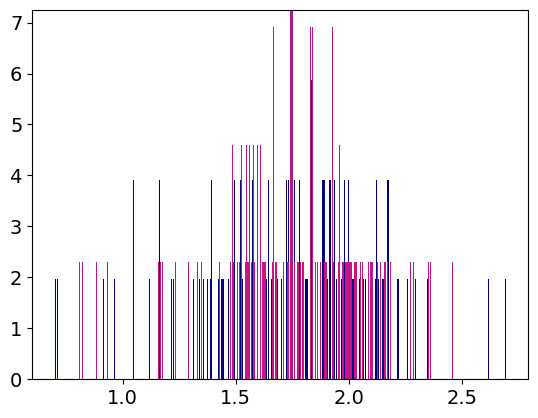

In [12]:
layer = 1

column_norms = np.linalg.norm(M[layer], axis = 0)
row_norms = np.linalg.norm(M[layer], axis = 1)
column_mean = column_norms.mean()
column_std = column_norms.std()
column_median = np.mean(column_norms)
row_mean = row_norms.mean()
row_std = row_norms.std()
row_median = np.median(row_norms)

num_std = 3
row_outliers = np.sum(row_norms > row_mean + num_std * row_std)
column_outliers = np.sum(column_norms > column_mean + num_std * column_std)


print(f"score {(column_outliers - row_outliers) / (column_outliers + row_outliers)}")
print(f' columns : {column_outliers} , rows: {row_outliers}')
plt.hist(column_norms, density = True, bins = 500, color = 'navy')
plt.hist(row_norms, density = True, bins = 500, color = 'mediumvioletred')
plt.axvline(x = column_mean, color = 'navy', linewidth = 2)
plt.axvline(x = row_mean, color = 'mediumvioletred', linewidth = 2)

In [ ]:
## TinyGPT models
from transformers import AutoModelForCausalLM

path = ["transformer.h[", 
        "].attn.attention.q_proj.weight", 
        "].attn.attention.k_proj.weight"]

'TinyGPT 1m (l = 8, d = 64, h = 1 ; 1M parameters)'
dh = 64
l = 8
d = 64
h = d // dh
model = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-1M")

M = []
for layer in range(l):
    Wq = get_nested_attr(model, path[0] + f"{layer}" + path[1]).T.detach()
    Wk = get_nested_attr(model, path[0] + f"{layer}" + path[2]).T.detach()
    M.append(Wq @ Wk.T)

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [31]:
scores = []
num_std = 3
for layer in range(l):
    
    column_norms = np.log(np.linalg.norm(M[layer], axis = 0))
    row_norms = np.log(np.linalg.norm(M[layer], axis = 1))
    column_mean = column_norms.mean()
    column_std = column_norms.std()
    column_median = np.mean(column_norms)
    row_mean = row_norms.mean()
    row_std = row_norms.std()
    row_median = np.median(row_norms)

    row_outliers = np.sum(row_norms > row_mean + num_std * row_std)
    column_outliers = np.sum(column_norms > column_mean + num_std * column_std)

    scores.append((column_outliers - row_outliers) / (column_outliers + row_outliers))

/var/folders/yy/3fh2plpd0txg1y9llct3rsv80000gn/T/ipykernel_17340/3680542551.py:17: RuntimeWarning: invalid value encountered in long_scalars
  scores.append((column_outliers - row_outliers) / (column_outliers + row_outliers))


In [32]:
scores

[nan, nan, nan, nan, nan, nan, nan, nan]

score 1.0
 columns : 1 , rows: 0


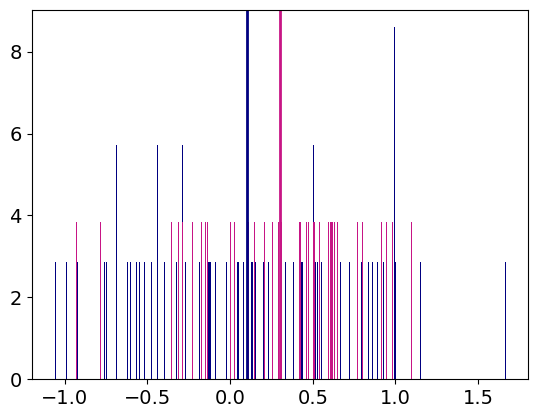

In [35]:
layer = 6

column_norms = np.log(np.linalg.norm(M[layer], axis = 0))
row_norms = np.log(np.linalg.norm(M[layer], axis = 1))
column_mean = column_norms.mean()
column_std = column_norms.std()
column_median = np.mean(column_norms)
row_mean = row_norms.mean()
row_std = row_norms.std()
row_median = np.median(row_norms)

num_std = 2
row_outliers = np.sum(row_norms > row_mean + num_std * row_std)
column_outliers = np.sum(column_norms > column_mean + num_std * column_std)


print(f"score {(column_outliers - row_outliers) / (column_outliers + row_outliers)}")
print(f' columns : {column_outliers} , rows: {row_outliers}')
plt.hist(column_norms, density = True, bins = 500, color = 'navy')
plt.hist(row_norms, density = True, bins = 500, color = 'mediumvioletred')
plt.axvline(x = column_mean, color = 'navy', linewidth = 2)
plt.axvline(x = row_mean, color = 'mediumvioletred', linewidth = 2)